In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

In [2]:
df = pd.read_parquet("hf://datasets/fancyzhx/ag_news/data/train-00000-of-00001.parquet")
texts = df['text'].tolist()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
model = SentenceTransformer('paraphrase-MiniLM-L12-v2')
embeddings = model.encode(texts, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/1875 [00:00<?, ?it/s]

In [4]:
X_scaled = StandardScaler().fit_transform(embeddings)

In [5]:
kmeans = KMeans(n_clusters=4, n_init=20, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [6]:
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Baseline Clustering (Raw Embeddings) - Silhouette Score: {sil_score:.4f}")

Baseline Clustering (Raw Embeddings) - Silhouette Score: 0.0262


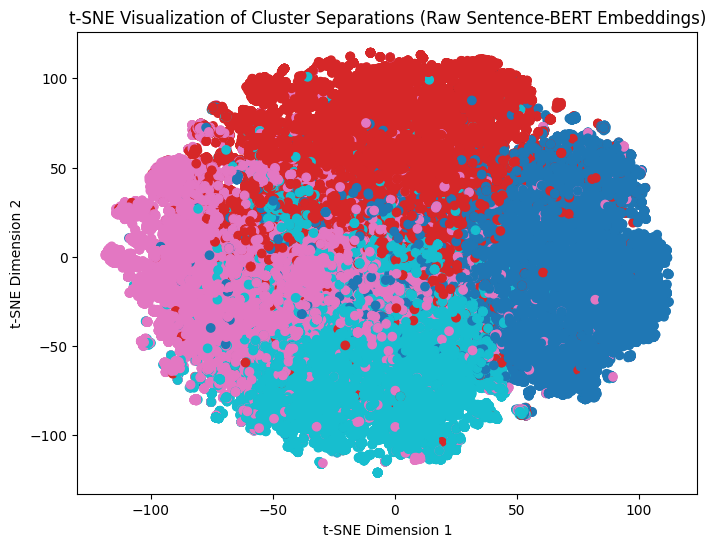

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab10')
plt.title("t-SNE Visualization of Cluster Separations (Raw Sentence-BERT Embeddings)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()